In [1]:
# !pip install torch torchvision
# !pip install pycocotools
# !pip install tqdm opencv-python

In [9]:
%matplotlib inline
from src.api import Detector

In [4]:
# weights can be downloaded from
# https://github.com/duanzhiihao/RAPiD/releases/download/v0.1/pL1_MWHB608_Mar11_4500.ckpt
detector = Detector(model_name='rapid',
                    weights_path='../models/weights/pL1_MWHB608_Mar11_4500.ckpt',
                    use_cuda=True)

Using backbone Darknet-53. Loading ImageNet weights....
Number of parameters in backbone: 40584928
Successfully initialized model rapid. Total number of trainable parameters: 61523734
Successfully loaded weights: ../models/weights/pL1_MWHB608_Mar11_4500.ckpt
Using CUDA...


In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def process_directory_box(img_dir, detector, input_size, conf_thres):
    # Liste tous les fichiers dans le dossier
    for filename in os.listdir(img_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtre pour les fichiers image
            img_path = os.path.join(img_dir, filename)  # Chemin complet vers l'image
            print(f"Processing {img_path}...")

            # Utiliser la méthode detect_one du détecteur
            result_image = detector.detect_one(
                img_path=img_path, 
                input_size=input_size,  # Spécification de la taille d'entrée
                conf_thres=conf_thres,  # Seuil de confiance
                return_img=True,  # Supposons que cela retourne l'image avec des boîtes
                visualize=False  # Désactivation de l'affichage automatique dans detect_one
            )
            
            # Affichage des résultats
            if result_image is not None:
                output_path = os.path.join("results", f"detected_{filename}")  # Chemin pour sauvegarder l'image
                plt.figure(figsize=(10, 10))
                plt.imshow(result_image)
                plt.savefig(output_path)
                plt.title(f"Detection for {filename}")
                plt.show()

Processing video_frames\frame_00.jpg...


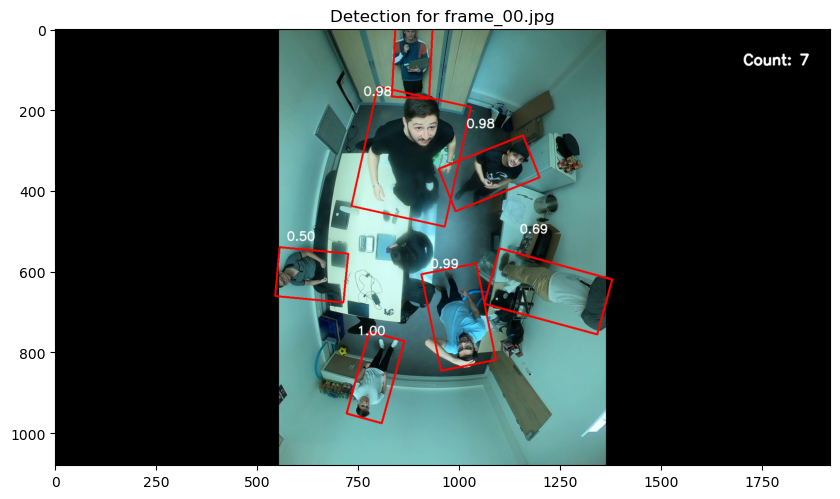

Processing video_frames\frame_13.jpg...


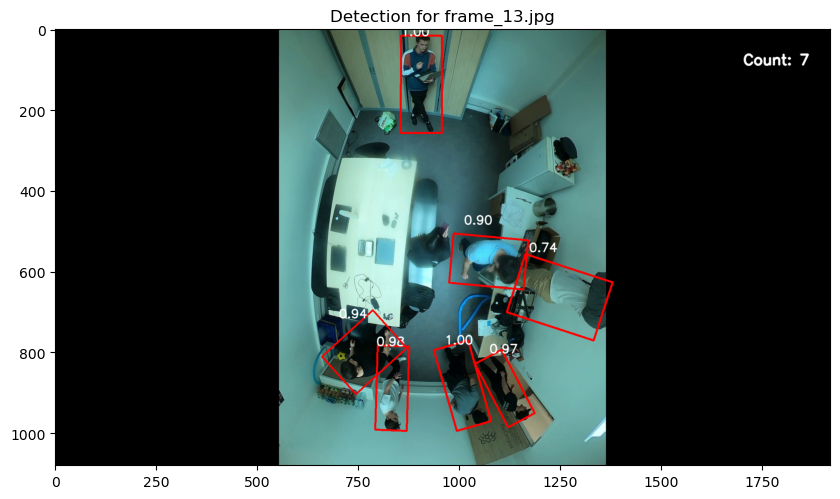

Processing video_frames\frame_26.jpg...


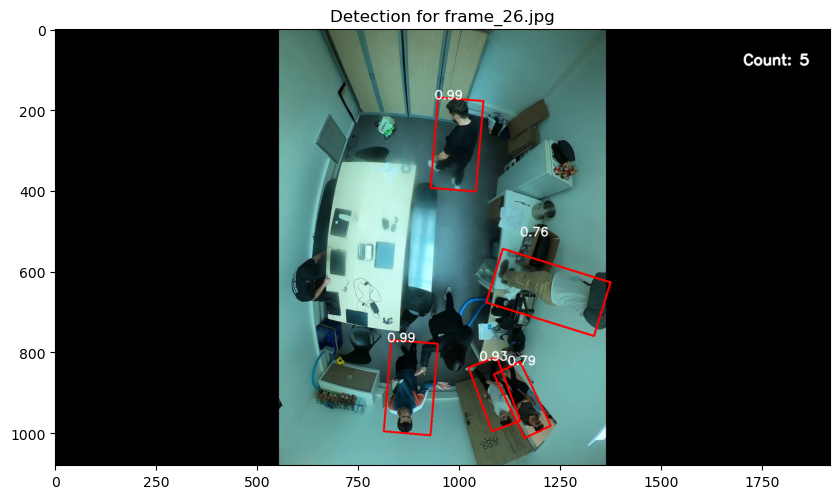

Processing video_frames\frame_39.jpg...


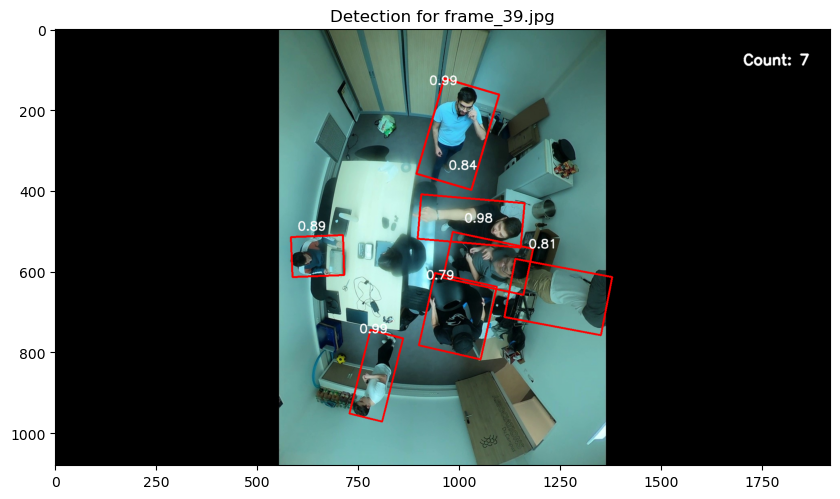

Processing video_frames\frame_43.jpg...


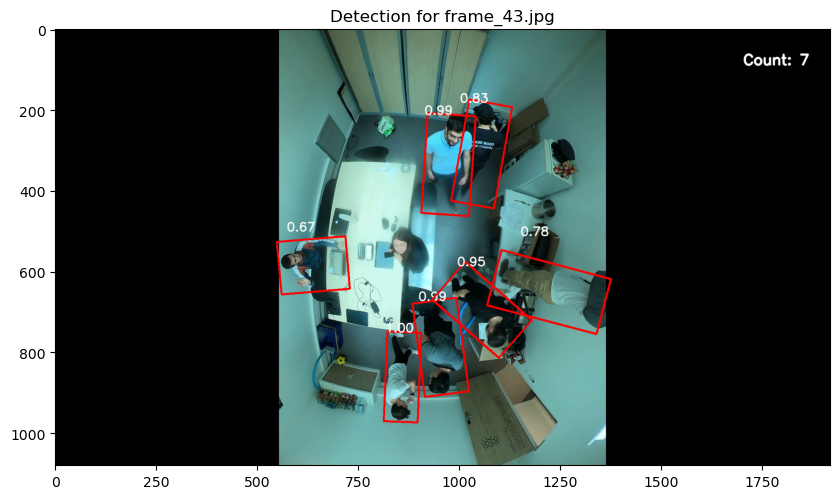

Processing video_frames\frame_52.jpg...


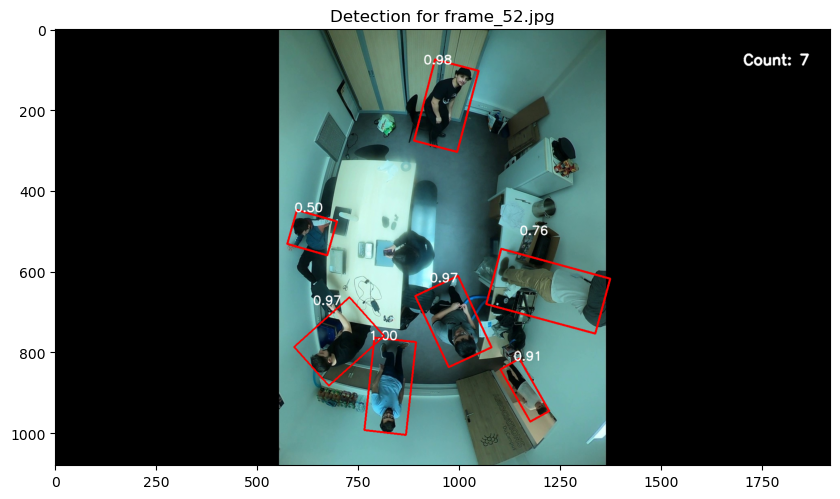

In [12]:
# Chemin vers le dossier contenant les images
img_dir = 'video_frames'

# Résolution d'entrée et seuil de confiance attendus par le modèle
input_size = 1024  # Par exemple 1024, à ajuster selon les exigences de votre modèle
conf_thres = 0.3  # Seuil de confiance

# Traitement du dossier
process_directory_box(img_dir, detector, input_size, conf_thres) 

Using backbone Darknet-53. Loading ImageNet weights....
Number of parameters in backbone: 40584928
Successfully initialized model rapid. Total number of trainable parameters: 61523734
Successfully loaded weights: ./weights/pL1_MWHB1024_Mar11_4000.ckpt
Using CUDA...
Processing ./images/video_frames/frame_0.jpg...
Processing ./images/video_frames/frame_1.jpg...
Processing ./images/video_frames/frame_10.jpg...
Processing ./images/video_frames/frame_11.jpg...
Processing ./images/video_frames/frame_12.jpg...
Processing ./images/video_frames/frame_13.jpg...
Processing ./images/video_frames/frame_14.jpg...
Processing ./images/video_frames/frame_15.jpg...
Processing ./images/video_frames/frame_16.jpg...
Processing ./images/video_frames/frame_17.jpg...
Processing ./images/video_frames/frame_18.jpg...
Processing ./images/video_frames/frame_19.jpg...
Processing ./images/video_frames/frame_2.jpg...
Processing ./images/video_frames/frame_20.jpg...
Processing ./images/video_frames/frame_21.jpg...
Pr

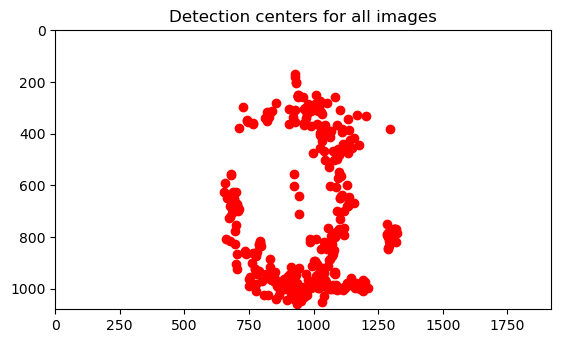

tensor([[ 8.3297e+02,  8.7688e+02,  9.1973e+01,  2.0280e+02,  9.8671e+00,
          9.9560e-01],
        [ 8.8575e+02,  1.2674e+02,  1.0801e+02,  2.4812e+02, -1.6166e+00,
          9.9356e-01],
        [ 9.9416e+02,  8.6002e+02,  8.5286e+01,  1.1684e+02, -3.2070e+01,
          9.7999e-01],
        [ 7.3861e+02,  8.2859e+02,  8.5509e+01,  2.3129e+02,  1.5633e+01,
          9.7678e-01],
        [ 7.2766e+02,  2.2178e+02,  1.8589e+02,  2.6115e+02, -8.1189e+01,
          8.2794e-01],
        [ 1.0634e+03,  5.5174e+02,  9.0124e+01,  1.6968e+02,  1.0021e+02,
          7.5019e-01],
        [ 1.2162e+03,  6.4318e+02,  1.3734e+02,  2.9049e+02, -7.8979e+01,
          5.7960e-01]])


In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def process_directory(img_dir, detector, input_size, conf_thres):
    # Liste des fichiers image
    image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No images found in the directory.")
        return

    # Utiliser les dimensions de la première image
    first_image_path = os.path.join(img_dir, image_files[0])
    with Image.open(first_image_path) as img:
        max_width, max_height = img.size

    # Créer une seule figure et des axes
    fig, ax = plt.subplots()
    ax.imshow(Image.new('RGB', (max_width, max_height), (255, 255, 255)))  # Fond blanc
    ax.set_xlim([0, max_width])
    ax.set_ylim([max_height, 0])

    # Traiter chaque fichier image dans le répertoire
    for filename in image_files:
        img_path = os.path.join(img_dir, filename)
        print(f"Processing {img_path}...")

        detections = detector.detect_one(
            img_path=img_path, 
            input_size=input_size,
            conf_thres=conf_thres,
            return_img=False
        )
        
        # Ajouter les centres des détections sur le plan
        if detections is not None and detections.numel() > 0:
            for detection in detections:
                x, y, w, h, angle, conf = detection
                center_x, center_y = x + w / 2, y + h / 2
                ax.plot(center_x, center_y, 'ro')

    plt.title("Detection centers for all images")
    plt.show()
    print(detections)

# Configuration initiale, à adapter selon votre cas
detector = Detector(model_name='rapid', weights_path='./weights/pL1_MWHB1024_Mar11_4000.ckpt', use_cuda=True)
img_dir = './images/video_frames/'
input_size = 1024
conf_thres = 0.3

process_directory(img_dir, detector, input_size, conf_thres)

In [ ]:
detector.detect_imgSeq(img_dir='./images/sample2/', input_size=1024, conf_thres=0.3)

Using PIL.Image format


100%|██████████| 11/11 [00:02<00:00,  4.69it/s]


[{'image_id': 'frame_0',
  'bbox': [793.5656127929688,
   861.2059326171875,
   90.49591827392578,
   213.26138305664062,
   14.563690185546875],
  'score': 0.9966567754745483,
  'segmentation': []},
 {'image_id': 'frame_0',
  'bbox': [1072.763916015625,
   363.3988342285156,
   118.73170471191406,
   225.66543579101562,
   57.2506103515625],
  'score': 0.9827636480331421,
  'segmentation': []},
 {'image_id': 'frame_0',
  'bbox': [880.021728515625,
   321.29498291015625,
   235.349853515625,
   309.5596923828125,
   18.169021606445312],
  'score': 0.9785738587379456,
  'segmentation': []},
 {'image_id': 'frame_0',
  'bbox': [999.6655883789062,
   712.7340698242188,
   145.927978515625,
   230.20738220214844,
   -18.478744506835938],
  'score': 0.9660441875457764,
  'segmentation': []},
 {'image_id': 'frame_0',
  'bbox': [883.5707397460938,
   84.39199829101562,
   89.87162780761719,
   170.07859802246094,
   2.902862548828125],
  'score': 0.9392904043197632,
  'segmentation': []},
 {'i